In [ ]:
library("tidyverse")
library("FactoMineR")
library("factoextra")
library("FactoInvestigate")
library("corrplot")

In [ ]:
df = read_csv('datasets/data.csv')
head(df)

# PCA

In [3]:
df_pca = df %>% select('score', 'n_matches', 'n_updates_photo', 'n_photos', 'sent_ana', 'length_prof', 'account_age')

# Apply PCA
res.pca = PCA(df_pca, scale.unit=TRUE, quanti.sup=1)

### Scree plot

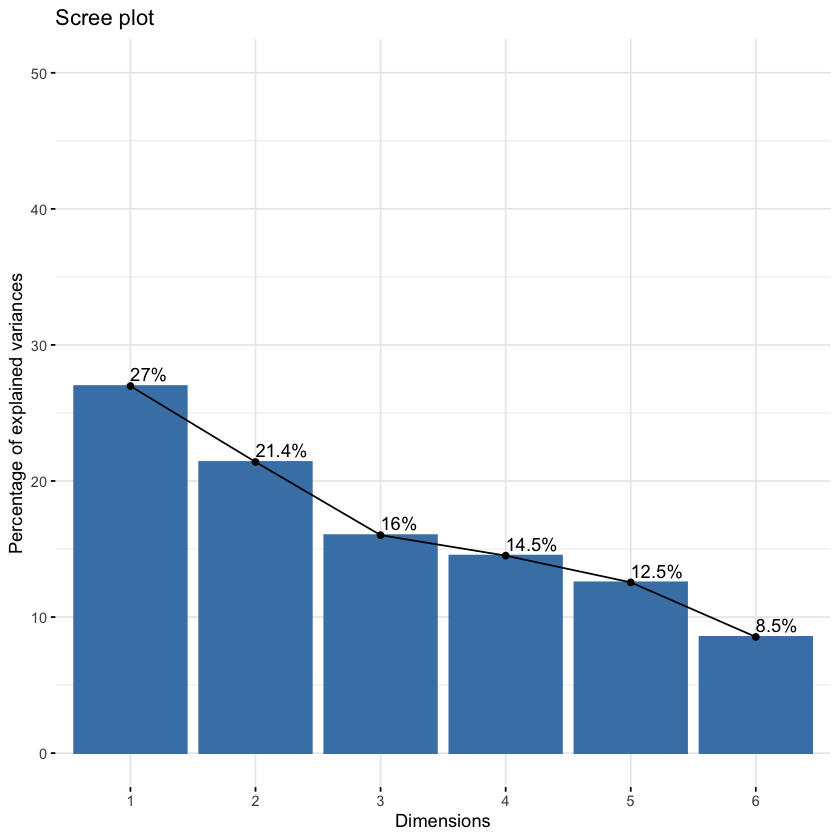

In [4]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50), repel = TRUE)

### Correlation circle

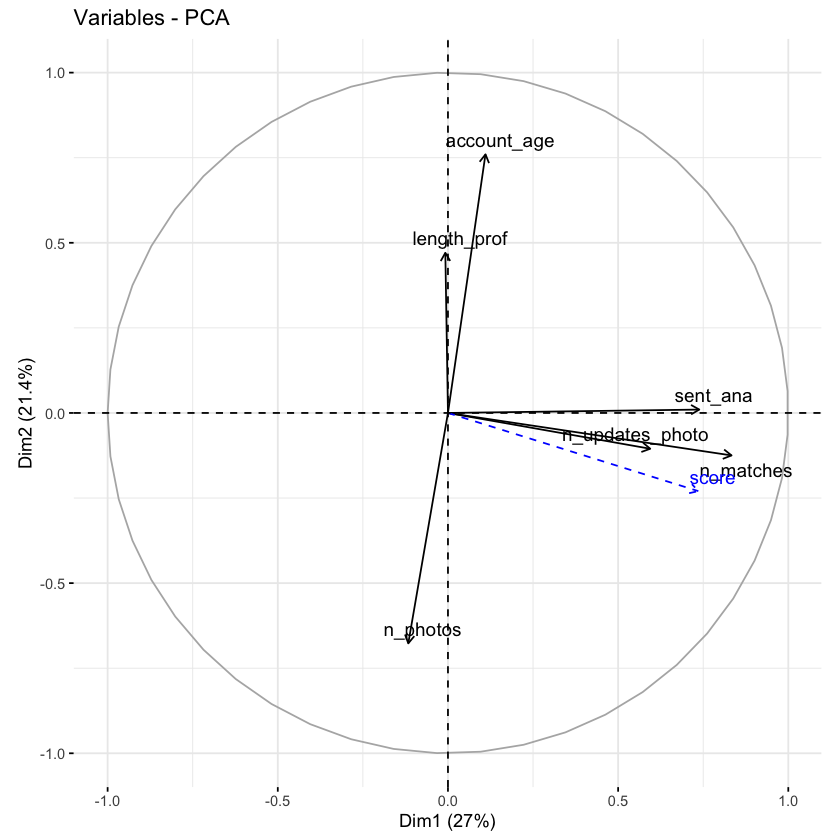

In [5]:
fviz_pca_var(res.pca, repel = TRUE)

### Individual plot

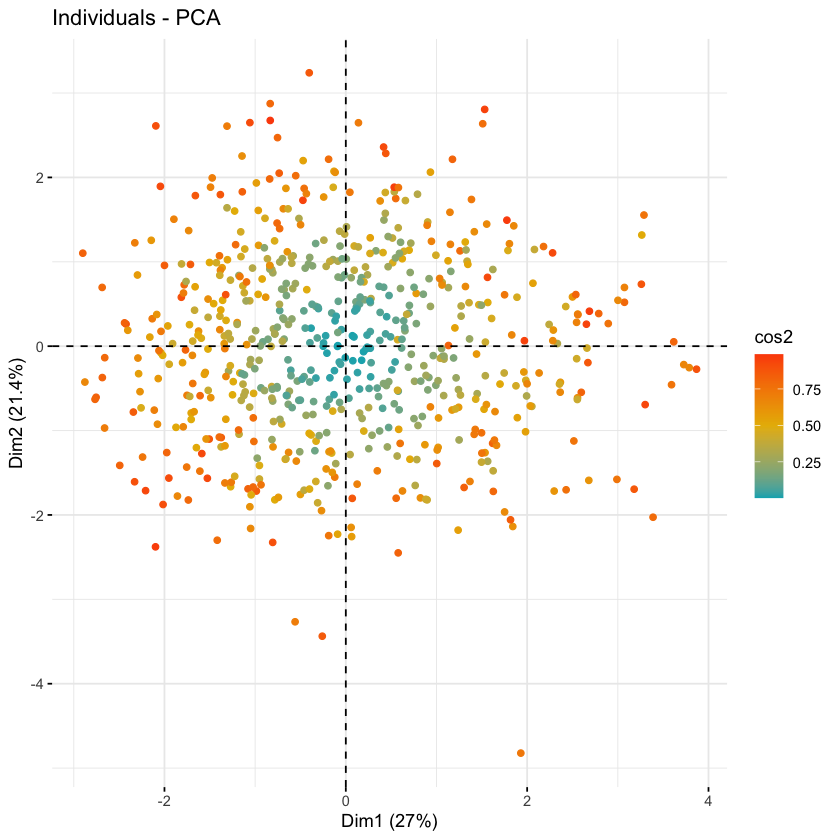

In [6]:
set.seed(123)
# Graph of individuals
fviz_pca_ind(res.pca, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             label = "none",
             select.ind = list(name = sample(1:2931, 750, replace=TRUE)), # 25% sample
             )

### Biplot

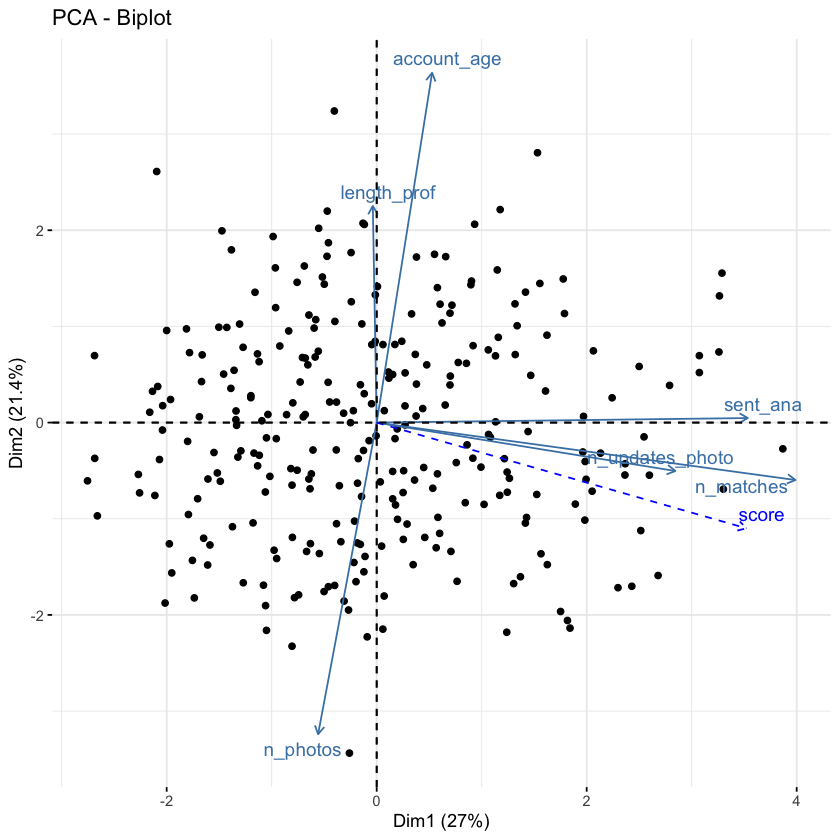

In [7]:
set.seed(123)
# Biplot of individuals and variables
fviz_pca_biplot(res.pca, label = "var",
                select.ind = list(name = sample(1:2931, 300, replace=TRUE)), # 10% sample
                repel = TRUE)

### Loadings plot of each Principal Component

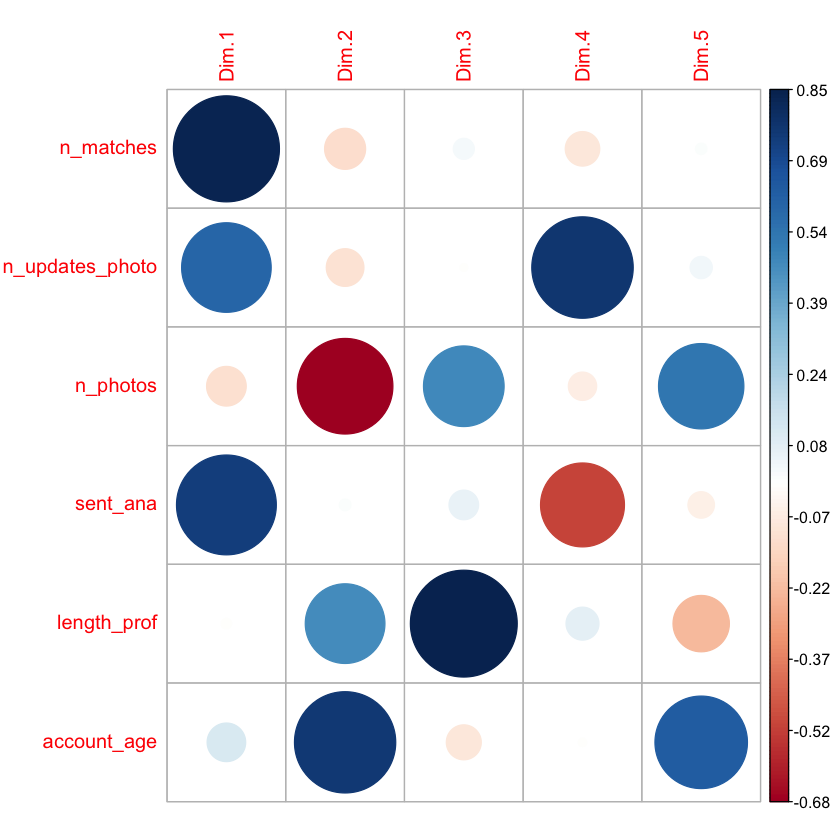

In [8]:
corrplot(res.pca$var$coord, is.corr=FALSE)